# LimpiezaEDA.

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Separamos es Dataset original en el csv de entrenamiento y el csv de test

In [42]:
# Leer el archivo CSV original.
df = pd.read_csv("../data/raw/coches-de-segunda-mano-sample.csv")

# Separo los registros de train.
train = df.tail(40000)
# Guardar los registros que destino para train en un nuevo csv.
train.to_csv("../data/train/coches_train.csv", index=False)
# Separo los ultimos 10000 registros para test.
test = df.tail(10000)
# Guardar los últimos registros para test en un nuevo csv.
test.to_csv("../data/test/coches_test.csv", index=False)

## Limpieza de datos.

In [43]:
# Creo el Dataframe con los datos del csv de "coches_train.csv"
df = pd.read_csv("../data/train/coches_train.csv")
df.head()

,url,company,make,model,version,price,price_financed,fuel,year,kms,...,doors,shift,color,photos,is_professional,dealer,province,country,publish_date,insert_date
0,d231f84f2fc3c62e49086c9e2cae3a09,9881bcdd5a0ad4733037b3fb25e69c3a,SEAT,Ibiza,SEAT Ibiza 1.4 TDI 77kW 105CV FR 5p.,11500,10454.0,Diésel,2017.0,88981,...,5,Manual,B4B4 Blanco (sÃ³lido),39,True,Ocasion Plus,Madrid,Spain,2021-01-04 13:05:43,2021-01-15 00:00:00
1,981ae51381b78033eec9986944bcfbbf,9881bcdd5a0ad4733037b3fb25e69c3a,FORD,Mondeo,FORD Mondeo 2.0 TDCi 110kW 150CV Trend 5p.,13999,12999.0,Diésel,2016.0,88000,...,5,Manual,Blanco,10,True,Guillen Motor,Murcia,Spain,2021-01-14 19:46:01,2021-01-15 00:00:00
2,8ad6e228a4393fdf97c8f0e908730169,9881bcdd5a0ad4733037b3fb25e69c3a,AUDI,A4,AUDI,6500,NaN,Diésel,2008.0,234000,...,4,Automático,Negro,9,False,d41219060e0c16c228ed4682cade6379,Baleares,Spain,2020-12-17 09:40:59,2021-01-15 00:00:00
3,15f08e312411d276f07cc43bed78eb8f,9881bcdd5a0ad4733037b3fb25e69c3a,MASERATI,Levante,MASERATI Levante S 5p.,54000,NaN,Gasolina,2016.0,62000,...,5,Automático,Azul,8,False,651faef175451b43088ed6fab4aab961,Madrid,Spain,2020-12-30 11:30:25,2021-01-15 00:00:00
4,da10dcae415dd7f21242308483192f9b,9881bcdd5a0ad4733037b3fb25e69c3a,SEAT,Exeo,SEAT Exeo 1.8 TSI 120 CV Reference 4p.,7500,NaN,Gasolina,2011.0,150000,...,4,Manual,Gris / Plata,16,True,Vehiculos Seminuevos J&J Cars S.L,Madrid,Spain,2020-12-29 16:17:40,2021-01-15 00:00:00


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   url              40000 non-null  object 
 1   company          40000 non-null  object 
 2   make             39999 non-null  object 
 3   model            39996 non-null  object 
 4   version          40000 non-null  object 
 5   price            40000 non-null  int64  
 6   price_financed   18927 non-null  float64
 7   fuel             39963 non-null  object 
 8   year             39998 non-null  float64
 9   kms              40000 non-null  int64  
 10  power            33211 non-null  float64
 11  doors            40000 non-null  int64  
 12  shift            39913 non-null  object 
 13  color            39525 non-null  object 
 14  photos           40000 non-null  int64  
 15  is_professional  40000 non-null  bool   
 16  dealer           40000 non-null  object 
 17  province    

In [45]:
df.describe()

,price,price_financed,year,kms,power,doors,photos
count,40000.000000,18927.000000,39998.000000,4.000000e+04,33211.000000,40000.000000,40000.000000
mean,15132.259425,18400.971205,2012.338767,1.158267e+05,146.026497,4.508675,16.250450
std,16379.568042,13364.380882,6.658098,1.066817e+05,71.242464,0.864808,12.456338
min,300.000000,700.000000,1970.000000,0.000000e+00,29.000000,2.000000,0.000000
25%,5500.000000,10789.500000,2007.000000,3.800000e+04,109.000000,4.000000,8.000000
50%,11795.000000,15500.000000,2015.000000,9.949150e+04,130.000000,5.000000,13.000000
75%,19750.000000,21990.000000,2018.000000,1.740000e+05,163.000000,5.000000,23.000000
max,549900.000000,428999.000000,2021.000000,5.000000e+06,800.000000,5.000000,54.000000


Las variables predictoras que quiero usar son:
- Marca del vehículo.
- Modelo del vehículo.
- Tipo de combustible.
- Año.
- Kilómetros.
- Potencia.
- Tipo de transmisión.

In [46]:
# Elimino la columna de precio financiado para evitar perdida de registros al limpiar los "Nan"
df = df.drop(columns="price_financed")

In [47]:
df = df.dropna()

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33029 entries, 0 to 39999
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   url              33029 non-null  object 
 1   company          33029 non-null  object 
 2   make             33029 non-null  object 
 3   model            33029 non-null  object 
 4   version          33029 non-null  object 
 5   price            33029 non-null  int64  
 6   fuel             33029 non-null  object 
 7   year             33029 non-null  float64
 8   kms              33029 non-null  int64  
 9   power            33029 non-null  float64
 10  doors            33029 non-null  int64  
 11  shift            33029 non-null  object 
 12  color            33029 non-null  object 
 13  photos           33029 non-null  int64  
 14  is_professional  33029 non-null  bool   
 15  dealer           33029 non-null  object 
 16  province         33029 non-null  object 
 17  country          

In [62]:
print(df["make"].value_counts())

make
VOLKSWAGEN       2949
BMW              2875
MERCEDES-BENZ    2855
AUDI             2520
PEUGEOT          2125
                 ... 
AUSTIN              1
UMM                 1
DAIHATSU            1
LOTUS               1
LDV                 1
Name: count, Length: 71, dtype: int64


<Axes: xlabel='price'>

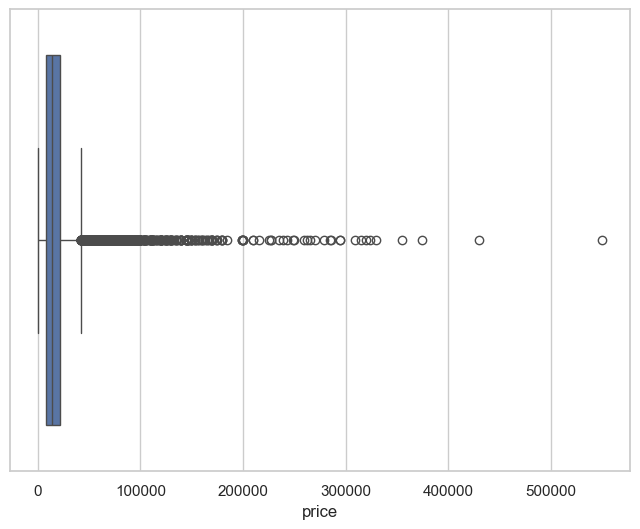

In [49]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.boxplot(x=df["price"])

In [78]:
coches_lujo = df['price'] > 100000
df_lujo = df[coches_lujo]
df = df.drop(df[coches_lujo].index)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32871 entries, 0 to 39999
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   url              32871 non-null  object 
 1   company          32871 non-null  object 
 2   make             32871 non-null  object 
 3   model            32871 non-null  object 
 4   version          32871 non-null  object 
 5   price            32871 non-null  int64  
 6   fuel             32871 non-null  object 
 7   year             32871 non-null  float64
 8   kms              32871 non-null  int64  
 9   power            32871 non-null  float64
 10  doors            32871 non-null  int64  
 11  shift            32871 non-null  object 
 12  color            32871 non-null  object 
 13  photos           32871 non-null  int64  
 14  is_professional  32871 non-null  bool   
 15  dealer           32871 non-null  object 
 16  province         32871 non-null  object 
 17  country          

<Axes: >

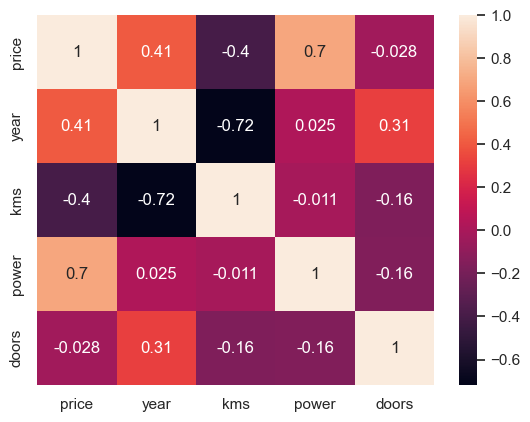

In [50]:
sns.heatmap(df[["price", "year", "kms", "power", "doors"]].corr(), annot= True)

## Modelos.

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [79]:
x = df[["year", "kms", "power"]]
y = df["price"]

In [80]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

### Lineal Regresion.

In [81]:
modelo_lr = LinearRegression()
modelo_lr.fit(x_train, y_train)

LinearRegression()

In [82]:
predictions = modelo_lr.predict(x_test)

In [83]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 4490.070090741136
MSE: 48406762.535683945
RMSE: 6957.496858474601


In [66]:
import pickle

with open('../models/modelo_lr.pkl', "wb") as archivo:
    pickle.dump(modelo_lr, archivo)

### Lineal Regresion con regresion polinomial de 3 

In [84]:
from sklearn.preprocessing import PolynomialFeatures


poly_feats = PolynomialFeatures(degree = 3)
poly_feats.fit(x)
X_poly = poly_feats.transform(x)

X_train, X_test, y_train, y_test = train_test_split(X_poly,y, test_size = 0.2, random_state=12)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

predictions = lin_reg.predict(X_test)

print("MAE:", metrics.mean_absolute_error(y_test, predictions))
print("MAPE:", metrics.mean_absolute_percentage_error(y_test, predictions))
print("MSE:", metrics.mean_squared_error(y_test, predictions))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print("r2_score train", lin_reg.score(X_train, y_train))
print("r2_score test",lin_reg.score(X_test, y_test))

MAE: 3385.774499765441
MAPE: 0.28760063114274587
MSE: 29197187.441340078
RMSE: 5403.442184509803
r2_score train 0.8159291695659817
r2_score test 0.8145295002895456


In [85]:
import pickle

with open('../models/modelo_polinomial_regression.pkl', "wb") as archivo:
    pickle.dump(modelo_lr, archivo)

### Pipeline

In [57]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression

In [58]:
pipe = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=4)),
    ('classifier', LogisticRegression())
])
pipe

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=4)),
                ('classifier', LogisticRegression())])

In [59]:
pipe.fit(x_train, y_train)
y_pred = pipe.predict(x_test)

ValueError: n_components=4 must be between 0 and min(n_samples, n_features)=3 with svd_solver='full'

In [ ]:
print("accuracy_score", accuracy_score(y_test, y_pred))
print("confusion_matrix\n", confusion_matrix(y_test, y_pred))

accuracy_score 0.024069028156221618
confusion_matrix
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
